# Martin Varbanov fn: 165 Homework 1

## download dependencies


In [1]:
!pip3 install numpy pandas matplotlib seaborn scikit-learn

### Init dependecies

In [2]:
import sys
import numpy as np
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
def encode_categorical(data, columns, encoders):
    data = data.fillna("")
    return pd.DataFrame({col: encoders[col].transform(data[col]) for col in columns},
                        index = data.index)

train = pd.read_csv('train.csv', index_col=['Id'])
test = pd.read_csv('test.csv', index_col=['Id'])

from sklearn.model_selection import train_test_split
train_no_sale_price = train.drop(labels=['SalePrice'], axis=1)
train_sale_price = train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3, 
                                                    random_state=4330)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

# list of str based cols
categorical_columns = train.dtypes[train.dtypes == 'object'].index
categorical_columns_test = train.dtypes[train.dtypes == 'object'].index

# list of numeric based features
numeric_column_names = x_train.describe().columns

# TODO replace these 0 elemens with training
x_train[numeric_column_names] = x_train[numeric_column_names].fillna(0)
x_test[numeric_column_names] = x_test[numeric_column_names].fillna(0)

# Dict of col_name => encoder_instance
train = train.fillna("")
test = test.fillna("")
encoders = {col: LabelEncoder().fit(train[col]) for col in categorical_columns}

# df of numerized str cols
train_encoded = encode_categorical(train, categorical_columns, encoders)

one_hot_encoder = OneHotEncoder().fit(train_encoded)
one_hot_x_train = one_hot_encoder.transform(encode_categorical(x_train[categorical_columns], categorical_columns, encoders))
one_hot_x_test = one_hot_encoder.transform(encode_categorical(x_test[categorical_columns],
                                                              categorical_columns,
                                                              encoders
                                                              ))

# numeric dfs
num_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
num_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)

/usr/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/usr/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [4]:
new_x_train = num_x_train
new_x_test = num_x_test
from sklearn.linear_model import LinearRegression 
all_data_lr = LinearRegression().fit(new_x_train, y_train)
print(all_data_lr.score(new_x_train, y_train))
print(all_data_lr.score(new_x_test, y_test))

0.9374774362429588
-24579597.715352975


### Normal distro

We will perform a Shapiro-Wilk test, which would check if features have normal distro

In [5]:
# Check which features have normal distribution
from scipy import stats
list_of_sw_test = []
for col in num_x_train.T:
    list_of_sw_test.append(stats.shapiro(col))
list_of_sw_test

/usr/lib/python3.7/site-packages/scipy/stats/morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/lib/python3.7/site-packages/scipy/stats/morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/lib/python3.7/site-packages/scipy/stats/morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


[(0.05973172187805176, 0.0),
 (0.22637856006622314, 0.0),
 (0.07596409320831299, 0.0),
 (0.5029979348182678, 0.0),
 (0.41569995880126953, 0.0),
 (0.03498876094818115, 0.0),
 (0.034989237785339355, 0.0),
 (0.25066113471984863, 0.0),
 (0.17072230577468872, 0.0),
 (0.1456279754638672, 0.0),
 (0.5940220355987549, 1.3872854796815689e-43),
 (0.149364173412323, 0.0),
 (0.06531709432601929, 0.0),
 (0.6106960773468018, 5.829401611591239e-43),
 (0.19990867376327515, 0.0),
 (0.1807956099510193, 0.0),
 (0.12194955348968506, 0.0),
 (0.33979547023773193, 0.0),
 (0.011690616607666016, 0.0),
 (0.011690616607666016, 0.0),
 (0.47472792863845825, 0.0),
 (0.2707122564315796, 0.0),
 (0.13798600435256958, 0.0),
 (0.03498876094818115, 0.0),
 (0.5639878511428833, 1.1210387714598537e-44),
 (0.2291768193244934, 0.0),
 (0.20297205448150635, 0.0),
 (0.06531709432601929, 0.0),
 (0.07596409320831299, 0.0),
 (0.020349621772766113, 0.0),
 (0.0707215666770935, 0.0),
 (0.17412149906158447, 0.0),
 (0.11776548624038696, 

### Results

Even though, the p-values look promising at a first glance, we can see that most features don't participate in the the 95% condifence interval, meaning that most features are not normaly distributed.

Standartization could be used if we required normalized data.

### Correlation
    
Lets explore the correlation matrix and what we information we can get from it:

In [6]:
# correlation matrix 
full_data_matrix = pd.np.concatenate([num_x_train, y_train[:, None]], axis=1)    
corr_matrix = np.corrcoef(full_data_matrix.T)


/usr/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [7]:
corr_matrix

array([[ 1.00000000e+00, -2.05656207e-02, -9.26502895e-03, ...,
         4.78959173e-02,  3.63285279e-02, -1.22561901e-01],
       [-2.05656207e-02,  1.00000000e+00, -2.41510807e-02, ...,
         7.42071412e-03, -4.90202393e-04,  1.11748994e-01],
       [-9.26502895e-03, -2.41510807e-02,  1.00000000e+00, ...,
         5.88512842e-02, -2.93566410e-02, -5.88817160e-02],
       ...,
       [ 4.78959173e-02,  7.42071412e-03,  5.88512842e-02, ...,
         1.00000000e+00, -1.02335462e-01,  4.48311059e-02],
       [ 3.63285279e-02, -4.90202393e-04, -2.93566410e-02, ...,
        -1.02335462e-01,  1.00000000e+00, -2.97524538e-02],
       [-1.22561901e-01,  1.11748994e-01, -5.88817160e-02, ...,
         4.48311059e-02, -2.97524538e-02,  1.00000000e+00]])

In [8]:
label_correlation = abs(corr_matrix[:, 304])
label_correlation.sort()
label_correlation

array([0.00383546, 0.00395298, 0.00395298, 0.0044607 , 0.00460942,
       0.00508551, 0.00576067, 0.00601938, 0.00603114, 0.00702482,
       0.00809834, 0.00956048, 0.01033141, 0.01038714, 0.01224291,
       0.01376407, 0.01426936, 0.01444711, 0.01483778, 0.01520409,
       0.01554507, 0.01591533, 0.01636119, 0.01713682, 0.01713682,
       0.01733768, 0.01737584, 0.01811869, 0.01815445, 0.02002139,
       0.02008685, 0.02047424, 0.02055136, 0.02062251, 0.02185001,
       0.02278265, 0.02292891, 0.02292891, 0.0239659 , 0.0239659 ,
       0.024247  , 0.02449243, 0.02542149, 0.02548649, 0.02767362,
       0.0280556 , 0.02906964, 0.02913002, 0.02918533, 0.02936273,
       0.02975245, 0.02982684, 0.03019241, 0.03019241, 0.03033671,
       0.03078456, 0.0309255 , 0.03151351, 0.03198168, 0.03220096,
       0.03287613, 0.03319903, 0.03345371, 0.03404368, 0.03455872,
       0.03501733, 0.03502185, 0.03571738, 0.03628349, 0.0363519 ,
       0.0374232 , 0.0388165 , 0.0391916 , 0.04061646, 0.04146

### Results:

We can see that there is a feature with correlation ratio of ~0.78 which is much more than the rest, lets find which one is it and make a model with it:

In [9]:
# Imame nqkolko nan feature-a, kakvo da gi pravim ?!
corr_val = 0.35
list_big_corr_features = []
count = 0
for el in abs(corr_matrix[:, 304]):
    if(el > corr_val and el < 1):
        list_big_corr_features.append((count,el))
    count +=1
list_big_corr_features

[(44, 0.37958278470666823),
 (131, 0.37060219974471836),
 (133, 0.41084326088666656),
 (135, 0.48445016565336374),
 (136, 0.6039175824683798),
 (143, 0.3542304935106423),
 (144, 0.5112984721576102),
 (149, 0.5456591746122976),
 (152, 0.467967466712883),
 (166, 0.43180477235575787),
 (183, 0.44837811471456884),
 (196, 0.4750183675959742),
 (199, 0.5306620804668672),
 (207, 0.4914045347404548),
 (210, 0.35256780569084684),
 (215, 0.3642225762664471),
 (219, 0.39334795582465815),
 (221, 0.4338277654533197),
 (223, 0.45423814959405606),
 (271, 0.782965720419962),
 (273, 0.5545393121999203),
 (274, 0.5138941543214242),
 (275, 0.43842223852579065),
 (276, 0.3736447110951567),
 (279, 0.5986321740456685),
 (280, 0.5836749539437646),
 (283, 0.6748193003541976),
 (286, 0.5443185532872182),
 (290, 0.49505394070995773),
 (291, 0.4581900994012131),
 (293, 0.6243088983939538),
 (294, 0.6129922514926708)]

In [10]:
top_feat_index = 271
num_x_train.T[top_feat_index]

matrix([[5., 9., 5., ..., 7., 4., 8.]])

God knows what this is, but it's our top information provider

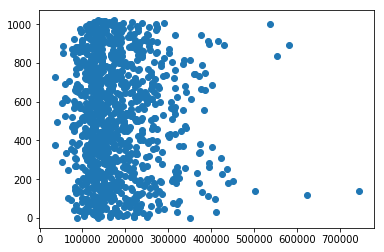

In [11]:
plt.scatter(y_train, [ el for el in range (0,1022)])
plt.show()

In [12]:
top_feat_list = np.asarray(num_x_train.T[top_feat_index]).reshape(-1)

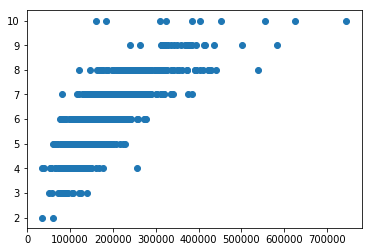

In [13]:
plt.scatter(y_train,top_feat_list)
plt.show()

In [14]:
X = num_x_train.T[top_feat_index].T
y = y_train

# Lets try a Lin Regression with Top feature
from sklearn.linear_model import LinearRegression 
single_regression = LinearRegression().fit(X,y)
print(single_regression.score(num_x_train.T[top_feat_index].T, y_train))
print(single_regression.score(num_x_test.T[top_feat_index].T, y_test))

yhat = single_regression.predict(X)
SSR = sum((y-yhat)**2)
SST = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/SST
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("*"*40)
print("SSR: {}, SST: {}, SSE: {}, R^2: {}, R^2_adj: {}".format(SSR, SST, SST-SSR, r_squared, adjusted_r_squared))

0.61303531935275
0.6504271387213075
****************************************
SSR: 2400325877961.58, SST: 6202958559284.325, SSE: 3802632681322.745, R^2: 0.6130353193527508, R^2_adj: 0.6126559422148613


/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


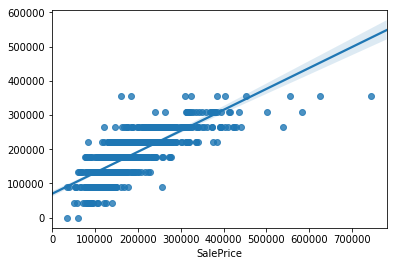

In [15]:
sns.regplot(y_train, yhat)

### Results:

We have a pretty bad result, but we've used only one feature, lets check if there is a feature which correlates with y, but doesn't with our top feature(is lin. independant)

Also from the Reg graph, we know that we'll not get a good linear approximation with a datastructure like that, maybe we should consider rebasing our data to a more non-linear form.

In [16]:
count = 0
top_feature_corr = []
for el in corr_matrix[:,top_feat_index]:
    if(abs(el) < 0.2):
        top_feature_corr.append((count,el))
    count +=1
print(top_feature_corr)

[(0, -0.15027128133910225), (1, 0.19512902135705962), (2, -0.053908139603137124), (3, 0.11311248818105402), (5, -0.07181579140708451), (6, 0.07181579140708451), (7, 0.0645900955236919), (8, -0.13704660109375133), (9, 0.057836134111685644), (10, 0.1832916313509384), (11, 0.06086693113151203), (12, 0.04834591701095126), (14, -0.08217859933051326), (15, 0.10788519349889804), (16, -0.02782900476736568), (17, 0.0009834887433631536), (18, 0.0016723462166709638), (19, -0.0016723462166709667), (20, -0.0018581302418483941), (21, 0.062290675561549165), (22, -0.013074006946528922), (23, 0.05370552808894199), (24, -0.03605805672907872), (25, 0.051054879811368206), (26, -0.0464364194724275), (27, -0.020289018112791584), (28, 0.07728477364585631), (29, -0.0023662137571260505), (30, -0.034265210760258284), (31, -0.12367728681648758), (32, -0.04355578365185734), (33, 0.11478246908996154), (34, 0.020157329715555086), (35, -0.17927570959405248), (36, 0.09786271787121306), (37, -0.18143181454750845), (38

There are a lot of features that are lin. independant from our feature, lets get only those with high correlation to the y label

In [17]:
count = 0
top_feature_corr = []
y_index = 304
for corr_feat, corr_y in zip(corr_matrix[:,top_feat_index], corr_matrix[:,y_index]):
    if(abs(corr_feat) < 0.2):
        if(abs(corr_y) > 0.25):
            top_feature_corr.append((count,corr_feat, corr_y))
    count +=1
print(top_feature_corr)

[(160, 0.18593025568117938, 0.29602546407496777), (270, 0.08641172844694954, 0.25165099513262623), (284, 0.1279905827094412, 0.2584536985704215)]


### Results

Lets could add feat. 160 becuase it correlates good with y, but feat. 270 has a minimal correlation with our top feature

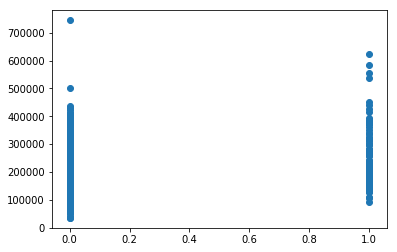

In [18]:
feat_160_list = np.asarray(num_x_train.T[160]).reshape(-1)
plt.scatter(feat_160_list, y_train)

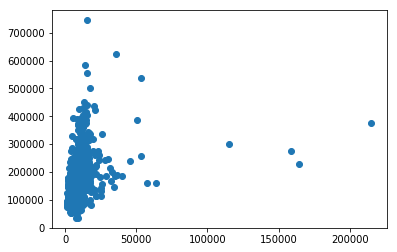

In [19]:
feat_270_list = np.asarray(num_x_train.T[270]).reshape(-1)
plt.scatter(feat_270_list, y_train)

In [20]:
X = num_x_train.T[top_feat_index].T
sec_index = 160
secondary_feat = num_x_train.T[sec_index].T
X = np.append(X, secondary_feat, axis=1)
y = y_train

X_test = num_x_test.T[top_feat_index].T
sec_index = 160
secondary_feat = num_x_test.T[sec_index].T
X_test = np.append(X_test, secondary_feat, axis=1)

# Lets try a Lin Regression with Top feature
from sklearn.linear_model import LinearRegression 
single_regression = LinearRegression().fit(X,y)
print(single_regression.score(X, y_train))
print(single_regression.score(X_test, y_test))

yhat = single_regression.predict(X)
SSR = sum((y-yhat)**2)
SST = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/SST
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("*"*40)
print("SSR: {}, SST: {}, SSE: {}, R^2: {}, R^2_adj: {}".format(SSR, SST, SST-SSR, r_squared, adjusted_r_squared))

0.6364805580108044
0.6742634716333551
****************************************
SSR: 2254896034153.1436, SST: 6202958559284.325, SSE: 3948062525131.1816, R^2: 0.6364805580108042, R^2_adj: 0.6357670752983622


In [21]:
X = num_x_train.T[top_feat_index].T
sec_index = 270
secondary_feat = num_x_train.T[sec_index].T
X = np.append(X, secondary_feat, axis=1)
y = y_train

X_test = num_x_test.T[top_feat_index].T
secondary_feat = num_x_test.T[sec_index].T
X_test = np.append(X_test, secondary_feat, axis=1)

# Lets try a Lin Regression with Top feature
from sklearn.linear_model import LinearRegression 
single_regression = LinearRegression().fit(X,y)
print(single_regression.score(X, y_train))
print(single_regression.score(X_test, y_test))

yhat = single_regression.predict(X)
SSR = sum((y-yhat)**2)
SST = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/SST
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("*"*40)
print("SSR: {}, SST: {}, SSE: {}, R^2: {}, R^2_adj: {}".format(SSR, SST, SST-SSR, r_squared, adjusted_r_squared))

0.6471436409831234
0.6793123298381429
****************************************
SSR: 2188753372361.6353, SST: 6202958559284.325, SSE: 4014205186922.69, R^2: 0.6471436409831237, R^2_adj: 0.6464510867946706


### Results

Interesting enough, the feature having a better correlation with our top feature has a better result. (I expected the inverse)

### Next:

Lets play a little with our top feature, we will make x^2, x^3, x^20, log(x) features and see if there we get a result out of it

Another thing to consider is to compare the last two models with ANOVA

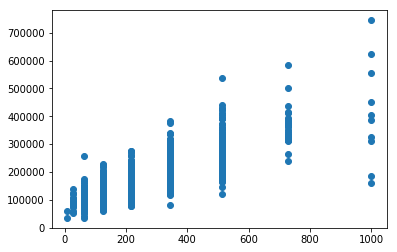

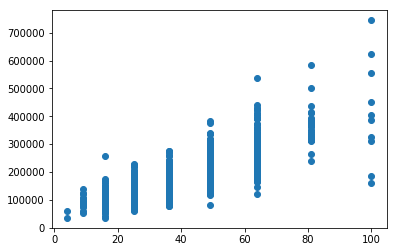

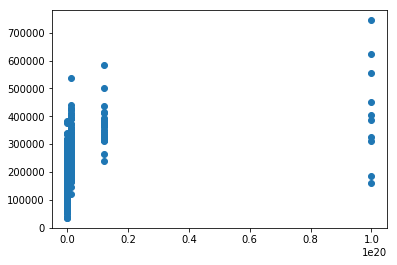

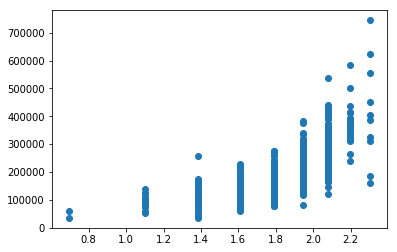

In [22]:
top_feat = num_x_train.T[top_feat_index].T
top_feat = np.array(top_feat)
xx = np.array([[el[0] ** 2 for el in top_feat]])
xxx = np.array([[el[0] ** 3 for el in top_feat]])
x20 = np.array([[el[0] ** 20 for el in top_feat]])
logx = np.array([[np.log(el[0])  for el in top_feat]])

top_feat_test = num_x_test.T[top_feat_index].T
top_feat_test = np.array(top_feat_test)
xx_test = np.array([[el[0] ** 2 for el in top_feat_test]])
xxx_test = np.array([[el[0] ** 3 for el in top_feat_test]])
x20_test = np.array([[el[0] ** 20 for el in top_feat_test]])
logx_test = np.array([[np.log(el[0])  for el in top_feat_test]])

X_train_arr, X_test_arr = [xx, xxx, x20, logx], [xx_test, xxx_test, x20_test, logx_test]

plt.scatter(xxx, y)
plt.show()
plt.scatter(xx,y)
plt.show()
plt.scatter(x20,y)
plt.show()
plt.scatter(logx,y)

In [23]:
for X, X_test in zip(X_train_arr, X_test_arr):    
    X = X.T
    sec_index = 270
    secondary_feat = num_x_train.T[sec_index].T
    X = np.append(X, secondary_feat, axis=1)
    y = y_train

    X_test = X_test.T
    secondary_feat = num_x_test.T[sec_index].T
    X_test = np.append(X_test, secondary_feat, axis=1)

    # Lets try a Lin Regression with Top feature
    from sklearn.linear_model import LinearRegression 
    single_regression = LinearRegression().fit(X,y)
    print(single_regression.score(X, y_train))
    print(single_regression.score(X_test, y_test))

    yhat = single_regression.predict(X)
    SSR = sum((y-yhat)**2)
    SST = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SSR))/SST
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print("*"*40)
    print("SSR: {}, SST: {}, SSE: {}, R^2: {}, R^2_adj: {}".format(SSR, SST, SST-SSR, r_squared, adjusted_r_squared))
    print("^"*40)

0.6788009582473367
0.7349269997941817
****************************************
SSR: 1992384345273.604, SST: 6202958559284.325, SSE: 4210574214010.721, R^2: 0.6788009582473371, R^2_adj: 0.6781705381457617
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
0.6849611240889055
0.7582170598590499
****************************************
SSR: 1954173091840.035, SST: 6202958559284.325, SSE: 4248785467444.29, R^2: 0.6849611240889057, R^2_adj: 0.6843427945974218
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
0.19712660958098882
0.3424238991280434
****************************************
SSR: 4980190369121.226, SST: 6202958559284.325, SSE: 1222768190163.0996, R^2: 0.1971266095809897, R^2_adj: 0.19555080312285622
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
0.5862628593122362
0.5470784454761016
****************************************
SSR: 2566394338122.984, SST: 6202958559284.325, SSE: 3636564221161.3413, R^2: 0.5862628593122368, R^2_adj: 0.5854508138938113
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


### Results:

We managed to improve our model just my scaling our top feature and we know that at some point it would decay, lets find out when:
    

In [24]:
top_feat = num_x_train.T[top_feat_index].T
top_feat = np.array(top_feat)
X = np.array([[el[0] ** 4 for el in top_feat]])

top_feat_test = num_x_test.T[top_feat_index].T
top_feat_test = np.array(top_feat_test)
X_test = np.array([[el[0] ** 4 for el in top_feat_test]])


X = X.T
sec_index = 270
secondary_feat = num_x_train.T[sec_index].T
X = np.append(X, secondary_feat, axis=1)
y = y_train

X_test = X_test.T
secondary_feat = num_x_test.T[sec_index].T
X_test = np.append(X_test, secondary_feat, axis=1)

# Lets try a Lin Regression with Top feature
from sklearn.linear_model import LinearRegression 
double_model = LinearRegression().fit(X,y)
print(double_model.score(X, y_train))
print(double_model.score(X_test, y_test))

yhat = double_model.predict(X)
SSR = sum((y-yhat)**2)
SST = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/SST
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("*"*40)
print("SSR: {}, SST: {}, SSE: {}, R^2: {}, R^2_adj: {}".format(SSR, SST, SST-SSR, r_squared, adjusted_r_squared))
print("^"*40)

0.6693664028713784
0.7572170030668176
****************************************
SSR: 2050906501295.9463, SST: 6202958559284.325, SSE: 4152052057988.379, R^2: 0.6693664028713788, R^2_adj: 0.6687174654874168
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


### ANOVA comparison

Lets go back now to our first single model and compare it with this one using ANOVA

In [25]:
X = num_x_train.T[top_feat_index].T
y = y_train

# Lets try a Lin Regression with Top feature
from sklearn.linear_model import LinearRegression 
single_regression = LinearRegression().fit(X,y)
print(single_regression.score(num_x_train.T[top_feat_index].T, y_train))
print(single_regression.score(num_x_test.T[top_feat_index].T, y_test))

yhat = single_regression.predict(X)
SSR = sum((y-yhat)**2)
SST = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/SST
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("*"*40)
print("SSR: {}, SST: {}, SSE: {}, R^2: {}, R^2_adj: {}".format(SSR, SST, SST-SSR, r_squared, adjusted_r_squared))

0.61303531935275
0.6504271387213075
****************************************
SSR: 2400325877961.58, SST: 6202958559284.325, SSE: 3802632681322.745, R^2: 0.6130353193527508, R^2_adj: 0.6126559422148613


In [26]:
import statsmodels.api as sm
sm.stats.anova_lm(single_regression, double_model)

AttributeError: 'LinearRegression' object has no attribute 'scale'

# Въпрос: Как мога да използвам ANOVA за сравняване на два модела в Python ?

## Явно няма да стане

## нека направим един базисен модел, за да имаме база за сравенние:

### First, we will convert our matrices to dfs

In [27]:

df_num_x_train = pd.DataFrame(num_x_train)
df_num_x_test = pd.DataFrame(num_x_test)

In [28]:
df_num_x_train.head()

0    1    2    3    4    5    6    7    8    9     ...      294    295  \
0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0   ...      0.0    0.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   ...    738.0  184.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   ...    336.0    0.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   ...    532.0    0.0   
4  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   ...    693.0    0.0   

    296  297  298  299  300  301  302     303  
0   0.0  0.0  0.0  0.0  0.0  0.0  6.0  2007.0  
1   0.0  0.0  0.0  0.0  0.0  0.0  6.0  2009.0  
2   0.0  0.0  0.0  0.0  0.0  0.0  7.0  2009.0  
3  70.0  0.0  0.0  0.0  0.0  0.0  5.0  2010.0  
4   0.0  0.0  0.0  0.0  0.0  0.0  4.0  2006.0  

[5 rows x 304 columns]

In [29]:
X = df_num_x_train
X_test = df_num_x_test
y = y_train
print(num_x_test.shape)
print(num_x_test.shape)

from sklearn.linear_model import LinearRegression 
model = LinearRegression().fit(X,y)
print(model.score(X, y_train))
print(model.score(X_test, y_test))

yhat = model.predict(X)
SSR = sum((y-yhat)**2)
SST = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/SST
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("*"*40)
print("SSR: {}, SST: {}, SSE: {}, R^2: {}, R^2_adj: {}".format(SSR, SST, SST-SSR, r_squared, adjusted_r_squared))

(438, 304)
(438, 304)
0.9374774362429588
-24579597.715352975
****************************************
SSR: 387824872005.13416, SST: 6202958559284.325, SSE: 5815133687279.191, R^2: 0.9374774362429595, R^2_adj: 0.9109685668118015


### Second, we will remove fill all NaN values with 0s

In [30]:
df_num_x_train = df_num_x_train.fillna(0)
df_num_x_test = df_num_x_test.fillna(0)

In [31]:
model.fit(x_train[numeric_column_names], y_train)
model.score(x_train[numeric_column_names], y_train)
print("score for test:", model.score(x_test[numeric_column_names], y_test))


score for test: 0.8412021213022928


In [32]:
X = num_x_train
X_test = num_x_test
y = y_train

from sklearn.linear_model import LinearRegression 
model = LinearRegression().fit(X,y)
print(model.score(X, y_train))
print(model.score(X_test, y_test))

yhat = model.predict(X)
SSR = sum((y-yhat)**2)
SST = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/SST
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("*"*40)
print("SSR: {}, SST: {}, SSE: {}, R^2: {}, R^2_adj: {}".format(SSR, SST, SST-SSR, r_squared, adjusted_r_squared))

0.9374774362429588
-24579597.715352975
****************************************
SSR: 387824872005.13416, SST: 6202958559284.325, SSE: 5815133687279.191, R^2: 0.9374774362429595, R^2_adj: 0.9109685668118015


## Бъг

Получихме отрицателна стойносе за score-a  на test-a, след няколко часа дебъгване, copy -> paste-ване на вашия source, получаваш все същия резултат, но copy-> paste- нах и следващия ви модел

In [33]:

from sklearn.linear_model import Ridge

alpha = [0, 0.0001, 0.1, 1, 10, 100]

for a in alpha:
    all_data_lr = Ridge(alpha = a).fit(df_num_x_train, y_train)
    print('alpha:', a)
    print(all_data_lr.score(df_num_x_train, y_train), all_data_lr.score(df_num_x_test, y_test))
    print()

alpha: 0
0.9301509136832881 -1.1896713937148815e+18

alpha: 0.0001
0.9374773643659932 0.8469093716686451

alpha: 0.1
0.936445464241952 0.8596282428267878

alpha: 1
0.9227360656014941 0.8824267159987824

alpha: 10
0.8933107135132801 0.8922404784820506

alpha: 100
0.8524424288746798 0.8821692100273296



## Хипотеза:

$\exists$ някакви hotencode-нати feature-и, които в тестовия сет или дават някаква форма на грешка, нека видим дали можем да видим как върви корелацията в test set-a 

Нека да проследим каква е корелацията м/у данните и резултата:

In [34]:
result = pd.concat([df_num_x_train, y_train], axis=1, sort=False)
result

0    1    2    3    4    5    6    7    8    9    ...        295  \
0     0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
1     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      184.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
3     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
4     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
5     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
6     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
7     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      120.0   
8     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      132.0   
9     0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0    ...        0.0   
10    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      241.0   
11    0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
12    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
13    0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      120.0   
14    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0    ...        0.0   
15    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0    ...        0.0   
16    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      108.0   
17    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
18    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0    ...        0.0   
19    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0    ...        0.0   
20    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
21    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      144.0   
22    0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
23    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
24    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      110.0   
25    0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
26    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
27    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      194.0   
28    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
29    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      168.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...        ...   
1416  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1417  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1418  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1420  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1422  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1423  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1424  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1427  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1428  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1429  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1430  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1431  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1432  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1433  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1434  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1435  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1437  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1438  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1439  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1441  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
1443  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

Не се сляха правилно, нека пробваме друго:

In [35]:
result = pd.concat([df_num_x_train, y_train], axis=1, join_axes=[df_num_x_train.index])
print(result.shape)
print(result)

(1022, 305)
        0    1    2    3    4    5    6    7    8    9    ...        295  \
0     0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
1     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      184.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
3     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
4     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
5     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
6     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
7     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      120.0   
8     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      132.0   
9     0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0    ...        0.0   
10    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      241.0   
11    0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   


In [36]:
result = pd.concat([df_num_x_train, y_train], axis=1, join_axes=[x_train.index])
print(result.shape)
print(result)

(1022, 305)
        0    1    2    3    4    5    6    7    8    9    ...        295  \
Id                                                        ...              
128   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
878   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      147.0   
880   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      120.0   
163   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
1181  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    ...        NaN   
853   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      100.0   
77    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
603   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...        0.0   
728   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      114.0   
426   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      120.0   
778   0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0    ...        0.0   


In [37]:
df1 = df_num_x_train
df1['e'] = y_train
df1

0    1    2    3    4    5    6    7    8    9    ...       295  \
0     0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
1     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     184.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
3     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
4     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
5     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
6     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
7     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     120.0   
8     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     132.0   
9     0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0    ...       0.0   
10    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     241.0   
11    0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
12    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
13    0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     120.0   
14    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0    ...       0.0   
15    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0    ...       0.0   
16    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     108.0   
17    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
18    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0    ...       0.0   
19    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0    ...       0.0   
20    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
21    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     144.0   
22    0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
23    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
24    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     110.0   
25    0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
26    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
27    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     194.0   
28    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
29    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     168.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...       ...   
992   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
993   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     144.0   
994   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
995   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
996   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     466.0   
997   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     168.0   
998   0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0    ...       0.0   
999   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
1000  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     150.0   
1001  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     210.0   
1002  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     503.0   
1003  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
1004  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
1005  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...      36.0   
1006  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     224.0   
1007  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     192.0   
1008  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     222.0   
1009  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     288.0   
1010  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0    ...     210.0   
1011  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
1012  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0    ...       0.0   
1013  0.0  0.0  0.0  0.0  1.0  0.

In [38]:
y_train.isnull().sum(axis=0)

0

In [39]:

df1.isnull().sum().sort_values()


0        0
206      0
205      0
204      0
203      0
202      0
201      0
200      0
199      0
198      0
197      0
196      0
195      0
194      0
193      0
192      0
207      0
191      0
208      0
210      0
225      0
224      0
223      0
222      0
221      0
220      0
219      0
218      0
217      0
216      0
      ... 
84       0
83       0
82       0
81       0
80       0
79       0
78       0
77       0
92       0
93       0
94       0
95       0
111      0
110      0
109      0
108      0
107      0
106      0
105      0
151      0
104      0
102      0
101      0
100      0
99       0
98       0
97       0
96       0
103      0
e      303
Length: 305, dtype: int64

### Въпреки, че докарахме бройката на редовете и колконите, ... имаме NaN стойности в y_train колконата, каквито няма в y_train, трябва нещо друго да правим

In [40]:
pd.concat([df_num_x_train, x_train], axis=0, ignore_index=True)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


0    1    2    3    4    5    6    7    8    9      ...        \
0     0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0      ...         
1     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
2     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
3     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
4     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
5     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
6     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
7     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
8     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
9     0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0      ...         
10    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
11    0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0      ...         
12    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
13    0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
14    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0      ...         
15    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0      ...         
16    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
17    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
18    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0      ...         
19    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0      ...         
20    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
21    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
22    0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0      ...         
23    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
24    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
25    0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
26    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
27    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
28    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
29    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0      ...         
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...         
2014  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2015  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2016  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2017  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2018  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2019  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2020  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2021  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2022  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2023  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2024  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2025  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2026  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2027  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2028  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2029  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2030  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2031  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2032  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2033  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2034  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2035  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...         
2036  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      ...   

### Нека да ги видим тези 303 NaN реда

In [41]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df1)

0    1    2    3    4    5    6    7    8    9 ...    295    296  \
0     0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
5     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
8     0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  132.0    0.0   
11    0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0 ...    0.0  198.0   
12    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0   45.0   
18    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0 ...    0.0  547.0   
19    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0 ...    0.0   23.0   
20    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
24    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  110.0    0.0   
30    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  196.0   82.0   
32    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
33    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  400.0    0.0   
35    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
40    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  192.0   35.0   
41    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0 ...    0.0   57.0   
45    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...   80.0   64.0   
48    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  144.0   76.0   
52    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
59    0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  144.0  105.0   
66    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
67    0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
71    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  224.0   54.0   
72    0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0 ...  185.0    0.0   
74    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  239.0  132.0   
82    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  120.0   33.0   
85    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0   98.0   
87    0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0 ...    0.0   40.0   
91    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
96    0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0   27.0   
100   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...    ...    ...   
901   0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0 ...    0.0  263.0   
902   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
904   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
913   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  124.0   98.0   
920   0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0  144.0   
921   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  144.0   99.0   
923   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
936   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  144.0  133.0   
944   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  178.0   51.0   
947   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0   66.0   
952   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0   48.0   
954   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  192.0    0.0   
956   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  240.0    0.0   
959   0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
961   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...  183.0    0.0   
966   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0   40.0   
969   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
973   0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0 ...    0.0    0.0   
974   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0    0.0   
976   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 ...    0.0   49.0   
983   0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0 .

### Имайки предвид обстоятелствата ... нека просто да ги махнем тези редове

In [42]:
df1 = df1.dropna()
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df1)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 305 columns]

In [43]:
corr_matrix = np.corrcoef(df1.T)

/usr/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [44]:
corr_matrix[304]

array([ 5.83555734e-02,  3.16180738e-02,  2.84234755e-04,  5.67541994e-04,
       -3.44400238e-02, -4.28350502e-02,  4.28350502e-02,  2.39760409e-02,
       -2.96474407e-02, -1.90450956e-03,  8.98159077e-03, -3.46541471e-03,
       -3.97837259e-02, -7.83372817e-04, -2.89883543e-02,  2.48594768e-02,
       -2.13326983e-02,  1.50468130e-02,             nan,             nan,
       -5.40033917e-02,  3.51638029e-02,  1.23712913e-01,  3.44057188e-02,
       -2.16707825e-02,  2.21354190e-02, -8.82986332e-03, -3.94290468e-02,
        2.95455499e-02, -1.61819047e-02, -4.34259878e-02, -1.76095019e-02,
        2.62311407e-03, -7.97940903e-03, -2.79296483e-02, -2.28000799e-02,
        7.19656928e-02,  3.21297819e-02, -2.33667626e-02,  6.90097004e-02,
       -5.22668623e-02, -3.81236250e-02,  4.85715739e-02, -8.78640153e-03,
       -5.02668518e-02, -1.29563027e-02, -6.32345253e-03,  3.37561281e-02,
       -2.33939726e-03,  4.37134099e-02, -3.18594108e-02, -2.46751148e-03,
       -1.53362060e-02,  

In [45]:
label_correlation = abs(corr_matrix[:, 304])
label_correlation.sort()
label_correlation

array([2.36944883e-04, 2.39309228e-04, 2.84234755e-04, 5.67541994e-04,
       7.83372817e-04, 1.10489935e-03, 1.12548904e-03, 1.20137297e-03,
       1.38377655e-03, 1.53025741e-03, 1.90450956e-03, 2.00703368e-03,
       2.05063830e-03, 2.26915843e-03, 2.33939726e-03, 2.46751148e-03,
       2.62311407e-03, 2.91807524e-03, 3.16280184e-03, 3.21359021e-03,
       3.22959668e-03, 3.35001022e-03, 3.46541471e-03, 3.50552138e-03,
       3.56468746e-03, 3.66106033e-03, 4.00560422e-03, 4.34097439e-03,
       4.40853561e-03, 4.43336232e-03, 5.10517930e-03, 5.18346141e-03,
       5.34200406e-03, 5.52452130e-03, 6.01037021e-03, 6.32345253e-03,
       6.68410211e-03, 6.82771674e-03, 7.21310445e-03, 7.26725736e-03,
       7.34667518e-03, 7.59128806e-03, 7.89300111e-03, 7.89300111e-03,
       7.89300111e-03, 7.89300111e-03, 7.97940903e-03, 8.05851352e-03,
       8.23598422e-03, 8.23598422e-03, 8.50993017e-03, 8.52899024e-03,
       8.52899024e-03, 8.52899024e-03, 8.78640153e-03, 8.82986332e-03,
      

## Проблем: получихме повече nan корелационни коефициента, а не сме променяли нищо в данните

In [46]:
# correlation matrix 
full_data_matrix = pd.np.concatenate([num_x_train, y_train[:, None]], axis=1)    
full_data_matrix_test = pd.np.concatenate([num_x_test, y_test[:, None]], axis=1)    
corr_matrix = np.corrcoef(full_data_matrix.T)
corr_matrix

/usr/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[ 1.00000000e+00, -2.05656207e-02, -9.26502895e-03, ...,
         4.78959173e-02,  3.63285279e-02, -1.22561901e-01],
       [-2.05656207e-02,  1.00000000e+00, -2.41510807e-02, ...,
         7.42071412e-03, -4.90202393e-04,  1.11748994e-01],
       [-9.26502895e-03, -2.41510807e-02,  1.00000000e+00, ...,
         5.88512842e-02, -2.93566410e-02, -5.88817160e-02],
       ...,
       [ 4.78959173e-02,  7.42071412e-03,  5.88512842e-02, ...,
         1.00000000e+00, -1.02335462e-01,  4.48311059e-02],
       [ 3.63285279e-02, -4.90202393e-04, -2.93566410e-02, ...,
        -1.02335462e-01,  1.00000000e+00, -2.97524538e-02],
       [-1.22561901e-01,  1.11748994e-01, -5.88817160e-02, ...,
         4.48311059e-02, -2.97524538e-02,  1.00000000e+00]])

In [47]:
label_correlation = abs(corr_matrix[:, 304])
label_correlation.sort()
label_correlation

array([0.00383546, 0.00395298, 0.00395298, 0.0044607 , 0.00460942,
       0.00508551, 0.00576067, 0.00601938, 0.00603114, 0.00702482,
       0.00809834, 0.00956048, 0.01033141, 0.01038714, 0.01224291,
       0.01376407, 0.01426936, 0.01444711, 0.01483778, 0.01520409,
       0.01554507, 0.01591533, 0.01636119, 0.01713682, 0.01713682,
       0.01733768, 0.01737584, 0.01811869, 0.01815445, 0.02002139,
       0.02008685, 0.02047424, 0.02055136, 0.02062251, 0.02185001,
       0.02278265, 0.02292891, 0.02292891, 0.0239659 , 0.0239659 ,
       0.024247  , 0.02449243, 0.02542149, 0.02548649, 0.02767362,
       0.0280556 , 0.02906964, 0.02913002, 0.02918533, 0.02936273,
       0.02975245, 0.02982684, 0.03019241, 0.03019241, 0.03033671,
       0.03078456, 0.0309255 , 0.03151351, 0.03198168, 0.03220096,
       0.03287613, 0.03319903, 0.03345371, 0.03404368, 0.03455872,
       0.03501733, 0.03502185, 0.03571738, 0.03628349, 0.0363519 ,
       0.0374232 , 0.0388165 , 0.0391916 , 0.04061646, 0.04146

In [48]:
count = 0
for el in full_data_matrix[:,304]:
    if el is None:
        print("row {} is None: ".format(count))
    count +=1


### Добре, не знам как и защо, но тези данни са по- добри, нека просто тях да ползваме

In [49]:
df_train=pd.DataFrame(full_data_matrix)
df_test=pd.DataFrame(full_data_matrix_test)

In [50]:
nans = lambda df: df[df.isnull().any(axis=1)]
print(nans(df_train))
print(nans(df_test))

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 305 columns]
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 305 columns]


### Тук няма Nan стойности, изобщо, нека да пробваме модел

In [51]:
df_train.T[:304].T.shape

(1022, 304)

In [52]:
X = df_train.T[:304].T
X_test = df_test.T[:304].T
y = y_train

from sklearn.linear_model import LinearRegression 
model = LinearRegression().fit(X,y)
print(model.score(X, y_train))
print(model.score(X_test, y_test))

yhat = model.predict(X)
SSR = sum((y-yhat)**2)
SST = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/SST
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("*"*40)
print("SSR: {}, SST: {}, SSE: {}, R^2: {}, R^2_adj: {}".format(SSR, SST, SST-SSR, r_squared, adjusted_r_squared))

0.9374774362429588
-24579597.715352975
****************************************
SSR: 387824872005.13416, SST: 6202958559284.325, SSE: 5815133687279.191, R^2: 0.9374774362429595, R^2_adj: 0.9109685668118015


### Тъй като имаме неустановен бъг, ще ползваме само Ridge regression с минимална $\alpha$

In [53]:
X_train = df_train.T[:304].T
X_test = df_test.T[:304].T

y_train = df_train.T[304:].T
y_test = df_test.T[304:].T

In [54]:
from sklearn.linear_model import Ridge

alpha = [0, 0.0001, 0.1, 1, 10, 100, 500, 1000]

for a in alpha:
    all_data_lr = Ridge(alpha = a).fit(X_train, y_train)
    print('alpha:', a)
    print(all_data_lr.score(X_train, y_train), all_data_lr.score(X_test, y_test))
    print()

alpha: 0
0.9301606826128213 -1.189671393715002e+18

alpha: 0.0001
0.9374773643659932 0.8469093716687258

alpha: 0.1
0.9364454642419521 0.8596282428267875

alpha: 1
0.9227360656014942 0.8824267159987821

alpha: 10
0.8933107135132801 0.8922404784820497

alpha: 100
0.8524424288746798 0.8821692100273286

alpha: 500
0.8142532089738737 0.8560310132389632

alpha: 1000
0.7951383035345303 0.8410401042548536



### Най- напред ще вземем feature-те с по- голяма корелация

In [55]:
high_corr_level = []
lable_corr_vals = abs(corr_matrix[:, 304])
count = 0
min_corr_val = 0.2
for corr in lable_corr_vals:
    if(corr > min_corr_val and corr < 1):
        high_corr_level.append(count)
    count +=1

In [56]:
len(high_corr_level)

78

In [57]:
from sklearn.linear_model import Ridge

alpha = [0, 0.0001, 0.1, 1, 10, 100, 500, 1000]
X_train_model = X_train[high_corr_level]
X_test_model = X_test[high_corr_level]

for a in alpha:
    all_data_lr = Ridge(alpha = a).fit(X_train_model, y_train)
    print('alpha:', a)
    print(all_data_lr.score(X_train_model, y_train), all_data_lr.score(X_test_model, y_test))
    print()

alpha: 0
0.858899744444228 0.8206466868415756

alpha: 0.0001
0.8589078230343454 0.820574463177126

alpha: 0.1
0.8586068858990759 0.830012183842183

alpha: 1
0.8542183893306119 0.8556055666059279

alpha: 10
0.8420967800813277 0.8695498386903496

alpha: 100
0.8190973386964079 0.8634742908988955

alpha: 500
0.7918887410335532 0.844496005945826

alpha: 1000
0.7752186796266765 0.8322279752897985



### Явно имаме нужда от тези feature-и, нека да снижим летвата малко:

In [58]:
high_corr_level = []
lable_corr_vals = abs(corr_matrix[:, 304])
min_corr_val = [0.001, 0.05, 0.07, 0.1, 0.2, 0.5]
for min_val in min_corr_val:
    tmp_arr = []
    count = 0
    for corr in lable_corr_vals:
        if(corr > min_val and corr < 1):
            tmp_arr.append(count)
        count +=1
    high_corr_level.append(tmp_arr)

In [59]:
for el in high_corr_level:
    print(len(el))

301
207
172
151
78
13


In [60]:
from sklearn.linear_model import Ridge

for corr_col_index in high_corr_level:
    alpha = [0, 0.0001, 0.1, 1, 10, 100, 500, 1000]
    X_train_model = X_train[corr_col_index]
    X_test_model = X_test[corr_col_index]

    for a in alpha:
        all_data_lr = Ridge(alpha = a).fit(X_train_model, y_train)
        print('alpha:', a)
        print(all_data_lr.score(X_train_model, y_train), all_data_lr.score(X_test_model, y_test))
        print()
    print("*"*120)

alpha: 0
0.9367650325688229 -3.2865365219728237e+17

alpha: 0.0001
0.9374773643659932 0.8469093716693149

alpha: 0.1
0.936445464241952 0.8596282428267884

alpha: 1
0.9227360656014941 0.8824267159987825

alpha: 10
0.8933107135132801 0.8922404784820506

alpha: 100
0.8524424288746798 0.8821692100273294

alpha: 500
0.8142532089738734 0.8560310132389634

alpha: 1000
0.7951383035345301 0.8410401042548546

************************************************************************************************************************
alpha: 0
0.8894316712757099 0.8672340836352334

alpha: 0.0001
0.9184983915754227 0.8723349966261259

alpha: 0.1
0.9134182067281751 0.8709653149336982

alpha: 1
0.9021283078427399 0.8826951795542687

alpha: 10
0.8837893367532756 0.8902572059042916

alpha: 100
0.8481510685229816 0.8813718991254548

alpha: 500
0.8123410539650675 0.8568164605300012

alpha: 1000
0.7937772797687039 0.8424870075174482

*****************************************************************************

## Всеки feature ни носи незаменима информация, нека вместо да махаме слабите, да подсилим силните

In [61]:
top_feat_index = 271
# x20 = np.array([[el[0] ** 20 for el in top_feat]])
corr_matrix[304,271]

0.7829657204199619

In [62]:
X_train[top_feat_index].apply(lambda x: x ** 3).head()

0    125.0
1    729.0
2    125.0
3    343.0
4    343.0
Name: 271, dtype: float64

In [63]:
X_train[top_feat_index].head()

0    5.0
1    9.0
2    5.0
3    7.0
4    7.0
Name: 271, dtype: float64

In [64]:
X_train_pol = X_train
X_train_pol[top_feat_index] = X_train[top_feat_index].apply(lambda x: x ** 3)

X_test_pol = X_test
X_test_pol[top_feat_index] = X_test[top_feat_index].apply(lambda x: x ** 3)

In [65]:
X_train_pol.head()

0    1    2    3    4    5    6    7    8    9     ...      294    295  \
0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0   ...      0.0    0.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   ...    738.0  184.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   ...    336.0    0.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   ...    532.0    0.0   
4  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   ...    693.0    0.0   

    296  297  298  299  300  301  302     303  
0   0.0  0.0  0.0  0.0  0.0  0.0  6.0  2007.0  
1   0.0  0.0  0.0  0.0  0.0  0.0  6.0  2009.0  
2   0.0  0.0  0.0  0.0  0.0  0.0  7.0  2009.0  
3  70.0  0.0  0.0  0.0  0.0  0.0  5.0  2010.0  
4   0.0  0.0  0.0  0.0  0.0  0.0  4.0  2006.0  

[5 rows x 304 columns]

In [66]:
X_train[top_feat_index].head()

0    125.0
1    729.0
2    125.0
3    343.0
4    343.0
Name: 271, dtype: float64

In [67]:
X_test_pol.head()

0    1    2    3    4    5    6    7    8    9     ...      294    295  \
0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   ...    826.0  208.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   ...    434.0  100.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   ...    501.0  216.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   ...    288.0   64.0   
4  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0   ...    539.0    0.0   

     296  297  298    299  300  301   302     303  
0   44.0  0.0  0.0    0.0  0.0  0.0   9.0  2009.0  
1   48.0  0.0  0.0    0.0  0.0  0.0   7.0  2007.0  
2  231.0  0.0  0.0    0.0  0.0  0.0   6.0  2007.0  
3    0.0  0.0  0.0  160.0  0.0  0.0  10.0  2009.0  
4    0.0  0.0  0.0    0.0  0.0  0.0   4.0  2010.0  

[5 rows x 304 columns]

In [68]:
X_test[top_feat_index].head()

0    512.0
1    343.0
2    216.0
3     64.0
4    216.0
Name: 271, dtype: float64

In [69]:
from sklearn.linear_model import Ridge

# for corr_col_index in high_corr_level:
#     alpha = [0, 0.0001, 0.1, 1, 10, 100, 500, 1000]
#     X_train_model = X_train[corr_col_index]
#     X_test_model = X_test[corr_col_index]
alpha = [0, 0.0001, 0.1, 1, 10, 12, 15, 20, 100]
for a in alpha:
    all_data_lr = Ridge(alpha = a).fit(X_train_pol, y_train)
    print('alpha:', a)
    print(all_data_lr.score(X_train_pol, y_train), all_data_lr.score(X_test_pol, y_test))
    print()
print("*"*120)

alpha: 0
0.9258031293669523 -2.920087133626381e+18

alpha: 0.0001
0.9398969095452332 0.8567023681564785

alpha: 0.1
0.9388451651371382 0.8682329406420797

alpha: 1
0.9249882939118708 0.8890529758154994

alpha: 10
0.895805660094058 0.8994375640168185

alpha: 12
0.8933235874247052 0.8998902770266968

alpha: 15
0.8901838693177435 0.9003265260367241

alpha: 20
0.8859265816214477 0.9006377001993876

alpha: 100
0.8571425386206611 0.8945344399235612

************************************************************************************************************************


In [70]:
from sklearn.linear_model import Ridge

# for corr_col_index in high_corr_level:
#     alpha = [0, 0.0001, 0.1, 1, 10, 100, 500, 1000]
#     X_train_model = X_train[corr_col_index]
#     X_test_model = X_test[corr_col_index]
alpha = [0, 0.0001, 0.1, 1, 10, 12, 15, 20, 100]
for a in alpha:
    all_data_lr = Ridge(alpha = a).fit(X_train, y_train)
    print('alpha:', a)
    print(all_data_lr.score(X_train, y_train), all_data_lr.score(X_test, y_test))
    print()
print("*"*120)

alpha: 0
0.9258031293669523 -2.920087133626381e+18

alpha: 0.0001
0.9398969095452332 0.8567023681564785

alpha: 0.1
0.9388451651371382 0.8682329406420797

alpha: 1
0.9249882939118708 0.8890529758154994

alpha: 10
0.895805660094058 0.8994375640168185

alpha: 12
0.8933235874247052 0.8998902770266968

alpha: 15
0.8901838693177435 0.9003265260367241

alpha: 20
0.8859265816214477 0.9006377001993876

alpha: 100
0.8571425386206611 0.8945344399235612

************************************************************************************************************************


In [71]:
from sklearn.linear_model import Ridge

alpha = [0, 0.0001, 0.1, 1, 10, 100, 500, 1000]

for a in alpha:
    all_data_lr = Ridge(alpha = a).fit(X_train, y_train)
    print('alpha:', a)
    print(all_data_lr.score(X_train, y_train), all_data_lr.score(X_test, y_test))
    print()

alpha: 0
0.9258031293669523 -2.920087133626381e+18

alpha: 0.0001
0.9398969095452332 0.8567023681564785

alpha: 0.1
0.9388451651371382 0.8682329406420797

alpha: 1
0.9249882939118708 0.8890529758154994

alpha: 10
0.895805660094058 0.8994375640168185

alpha: 100
0.8571425386206611 0.8945344399235612

alpha: 500
0.8275849402428705 0.8799112562126629

alpha: 1000
0.8178872354751227 0.8744119496023719



In [72]:
X_train[top_feat_index].head()

0    125.0
1    729.0
2    125.0
3    343.0
4    343.0
Name: 271, dtype: float64

In [73]:
X_train_pol[top_feat_index].head()

0    125.0
1    729.0
2    125.0
3    343.0
4    343.0
Name: 271, dtype: float64

### Това не беше така

In [74]:
from sklearn.linear_model import Ridge

# for corr_col_index in high_corr_level:
#     alpha = [0, 0.0001, 0.1, 1, 10, 100, 500, 1000]
#     X_train_model = X_train[corr_col_index]
#     X_test_model = X_test[corr_col_index]
alpha = [a for a in range(16,26)]
for a in alpha:
    all_data_lr = Ridge(alpha = a).fit(X_train, y_train)
    print('alpha:', a)
    print(all_data_lr.score(X_train, y_train), all_data_lr.score(X_test, y_test))
    print()
print("*"*120)

alpha: 16
0.8892509214230532 0.9004234590537744

alpha: 17
0.8883633158893267 0.9005009665846504

alpha: 18
0.887516049823781 0.9005612785127701

alpha: 19
0.8867049686946651 0.9006063061047939

alpha: 20
0.8859265816214477 0.9006377001993876

alpha: 21
0.8851779241823365 0.9006568961589868

alpha: 22
0.8844564549084863 0.9006651492048361

alpha: 23
0.8837599760735253 0.9006635626074617

alpha: 24
0.8830865722813571 0.900653110465566

alpha: 25
0.8824345622805146 0.9006346563165755

************************************************************************************************************************


### Моделът ни дава най- висок $R^2$ score за $\alpha=22$

In [75]:
from sklearn.linear_model import Ridge

# for corr_col_index in high_corr_level:
#     alpha = [0, 0.0001, 0.1, 1, 10, 100, 500, 1000]
#     X_train_model = X_train[corr_col_index]
#     X_test_model = X_test[corr_col_index]
alpha = [a for a in range(10,27,2)]
for a in alpha:
    all_data_lr = Ridge(alpha = a).fit(X_train, pd.np.log10(y_train))
    print('alpha:', a)
    print(all_data_lr.score(X_train, pd.np.log10(y_train)), all_data_lr.score(X_test, pd.np.log10(y_test)))
    print()
print("*"*120)

alpha: 10
0.912968611563091 0.9240993060373187

alpha: 12
0.910988373904885 0.9242691441158513

alpha: 14
0.909269054264116 0.9243519149571792

alpha: 16
0.9077447178915697 0.924374640996998

alpha: 18
0.906371970981227 0.9243544067213738

alpha: 20
0.9051206996406818 0.9243026220403214

alpha: 22
0.9039691306533401 0.924227229222644

alpha: 24
0.9029009970890335 0.9241339381357434

alpha: 26
0.9019038157294998 0.9240269609191154

************************************************************************************************************************


### Нов най- добър резултат:

alpha: 16
0.9077447178915697 0.924374640996998

Сега ще пробваме да променим и другите два добри feature-a

In [76]:
feat_270_index = 270
feat_160_index = 160

corr_matrix[304, 160]

0.29602546407496777

In [77]:
# Imame nqkolko nan feature-a, kakvo da gi pravim ?!
corr_val = 0.35
list_big_corr_features = []
count = 0
for el in abs(corr_matrix[:, 304]):
    if(el > corr_val and el < 1):
        list_big_corr_features.append((count,el))
    count +=1
list_big_corr_features.sort(key=lambda tup: tup[1])  
print(list_big_corr_features)

[(210, 0.35256780569084684), (143, 0.3542304935106423), (215, 0.3642225762664471), (131, 0.37060219974471836), (276, 0.3736447110951567), (44, 0.37958278470666823), (219, 0.39334795582465815), (133, 0.41084326088666656), (166, 0.43180477235575787), (221, 0.4338277654533197), (275, 0.43842223852579065), (183, 0.44837811471456884), (223, 0.45423814959405606), (291, 0.4581900994012131), (152, 0.467967466712883), (196, 0.4750183675959742), (135, 0.48445016565336374), (207, 0.4914045347404548), (290, 0.49505394070995773), (144, 0.5112984721576102), (274, 0.5138941543214242), (199, 0.5306620804668672), (286, 0.5443185532872182), (149, 0.5456591746122976), (273, 0.5545393121999203), (280, 0.5836749539437646), (279, 0.5986321740456685), (136, 0.6039175824683798), (294, 0.6129922514926708), (293, 0.6243088983939538), (283, 0.6748193003541976), (271, 0.782965720419962)]


In [78]:
feat_283_index = 283
X_train[feat_283_index] = X_train[feat_283_index].apply(lambda x: x ** 2)

X_test_pol = X_test
X_test_pol[feat_283_index] = X_test[feat_283_index].apply(lambda x: x ** 2)

In [79]:

from sklearn.linear_model import Ridge

# for corr_col_index in high_corr_level:
#     alpha = [0, 0.0001, 0.1, 1, 10, 100, 500, 1000]
#     X_train_model = X_train[corr_col_index]
#     X_test_model = X_test[corr_col_index]
alpha = [a for a in range(10,27,2)]
for a in alpha:
    all_data_lr = Ridge(alpha = a).fit(X_train, pd.np.log10(y_train))
    print('alpha:', a)
    print(all_data_lr.score(X_train, pd.np.log10(y_train)), all_data_lr.score(X_test, pd.np.log10(y_test)))
    print()
print("*"*120)

alpha: 10
0.9323918294732654 0.9214767213173496

alpha: 12
0.9309749057131883 0.9214920474767028

alpha: 14
0.9297304894570759 0.9214197090847087

alpha: 16
0.9286179449994109 0.9212938101880359

alpha: 18
0.9276097092346772 0.9211339294076785

alpha: 20
0.9266862177992199 0.9209520456599241

alpha: 22
0.9258330729228486 0.9207558493171178

alpha: 24
0.9250393620269992 0.9205504635743635

alpha: 26
0.9242966088576555 0.920339400716943

************************************************************************************************************************


## Нов най- добър резултат:

alpha: 16 0.9077447178915697 0.924374640996998

Сега ще пробваме да променим и другите два добри feature-a